In [7]:
%matplotlib widget
# %matplotlib ipympl

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import random
from statistics import mean

import util.benchmark as benchmark
import util.plotting as plotting

# Algoritmo de filtrado cuadratico

In [11]:
def filterRepeated(amount, elems):
    uniques = []
    while len(elems) > 0:
        elem = elems[0]
        uniques.append(elem)
        nextElems = []
        for i in range(len(elems)):
            if elems[i] != elem:
                nextElems.append(elems[i])

        elems = nextElems
        
    return uniques

In [12]:
N = 1000
ITS = 100
Ns = list(range(1,N+1, int(N/ITS)))

## Peor caso: Todos unicos

In [13]:
worstCases = [(i,[e for e in range(i)]) for i in Ns]
worstResults = benchmark.benchmarkFuncForCases(10, filterRepeated, worstCases)

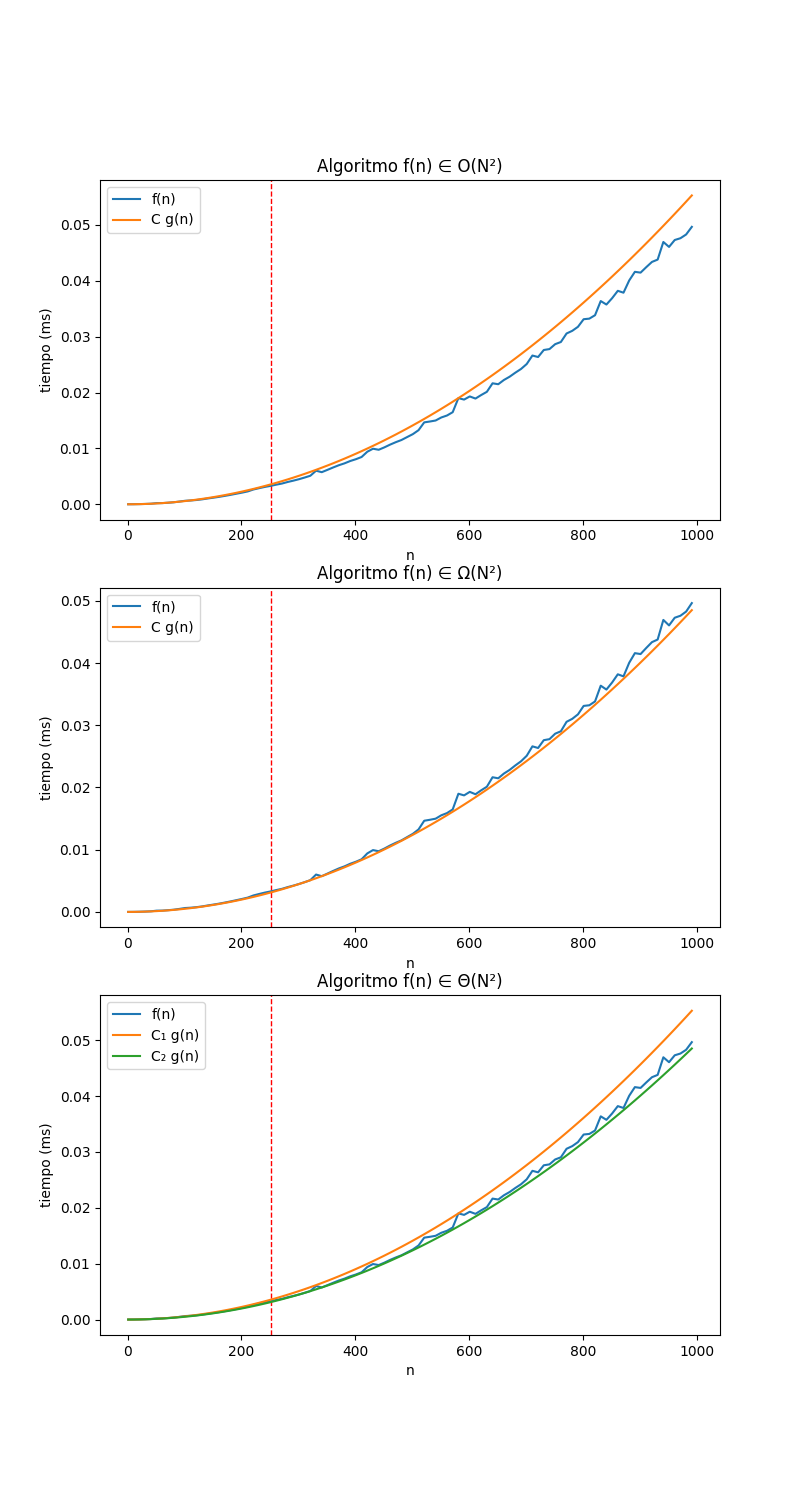

In [14]:
on = lambda n, _: n**2

plotting.plotFuncComplexityAnalysis(Ns, worstCases, worstResults, "N²", on, "N²", on, "N²", on, 25)

## Mejor caso: Todos iguales

In [15]:
bestCases = [(i,[1 for _ in range(i)]) for i in Ns]
bestResults = benchmark.benchmarkFuncForCases(1000, filterRepeated, bestCases)

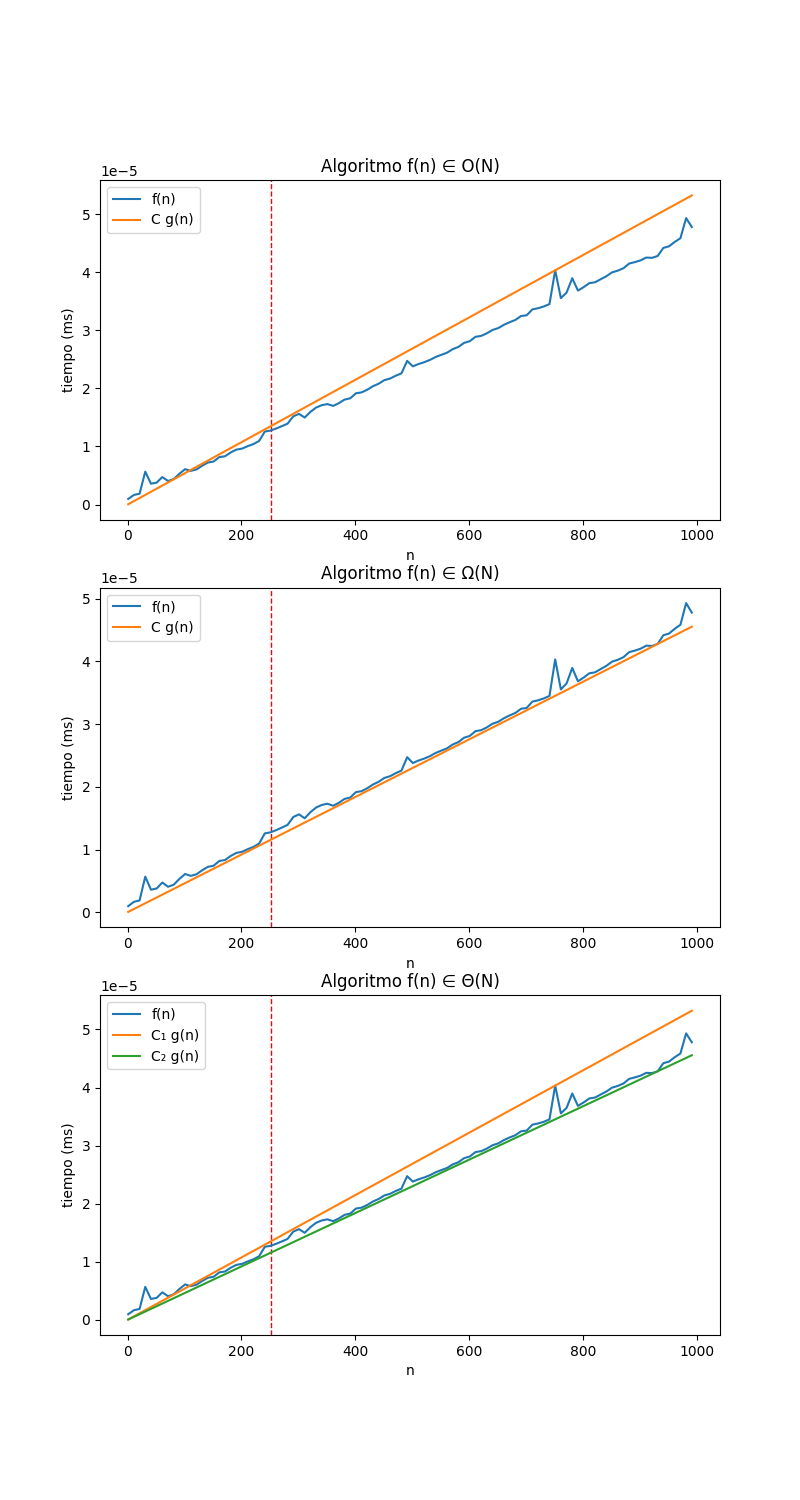

In [16]:
o1 = lambda n,_: n

plotting.plotFuncComplexityAnalysis(Ns, bestCases, bestResults, "N", o1, "N", o1, "N", o1, 25)

## Caso promedio: Todos al azar

In [18]:
avgCases = [([e for e in range(i)], 0) for i in Ns]
avgResultsRuns = []
for _ in range(20):
    avgCasesRun = [(i,[e for e in range(i)]) for i in Ns]
    avgResultsRun = benchmark.benchmarkFuncForCases(10, filterRepeated, avgCasesRun)
    
    avgResultsRuns.append(avgResultsRun)
avgResults = list(map(mean, zip(*avgResultsRuns)))

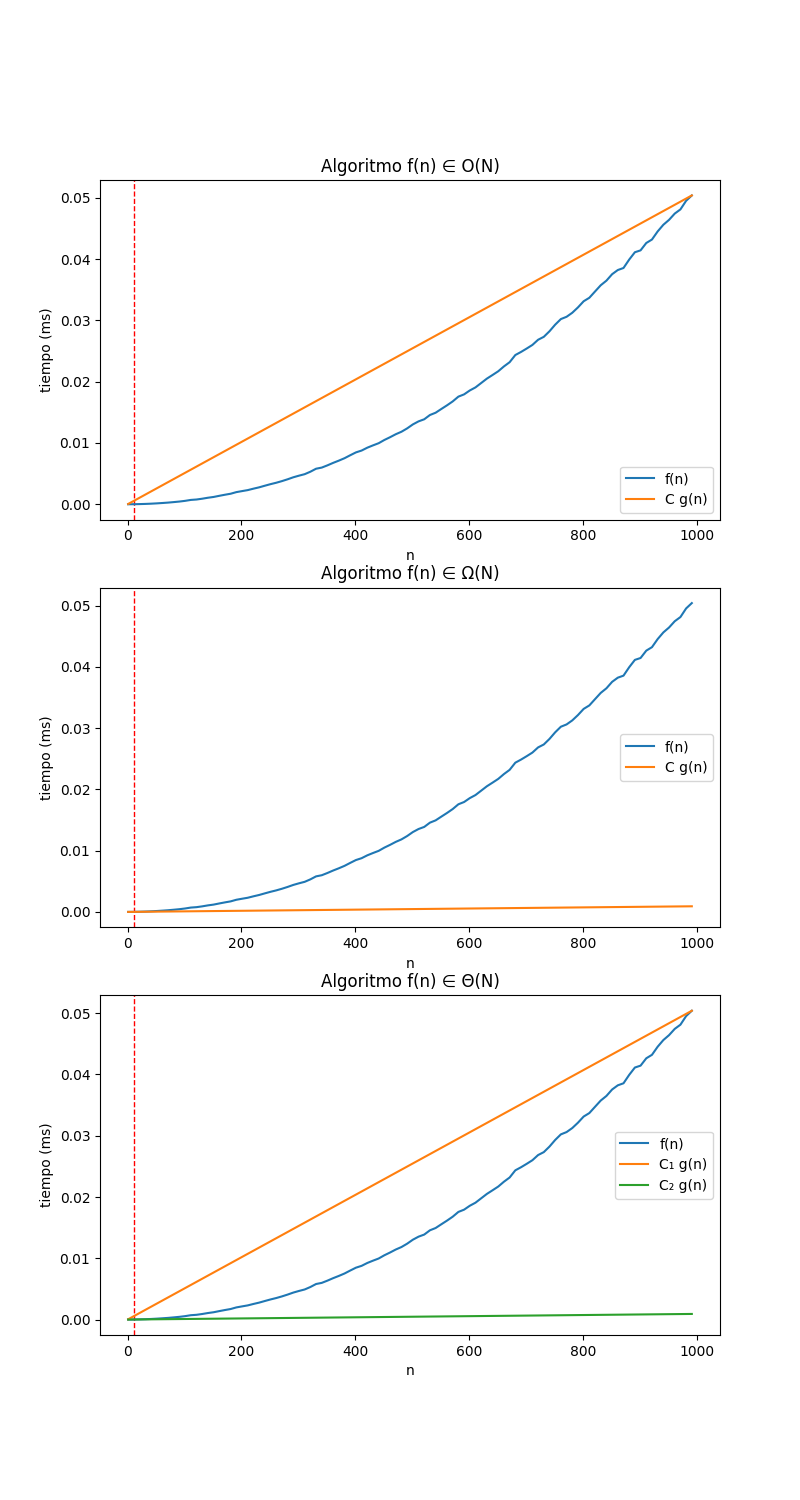

In [19]:
on = lambda list,_: len(list)

plotting.plotFuncComplexityAnalysis(Ns, avgCases, avgResults, "N", on, "N", on, "N", on, 1)